###Pre-Logic

In [95]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [96]:
myTempChangeDataset = pd.read_csv("climate_change_dataset.csv")
myTempChangeDataset.head(10)

,Country Name,Year,Count,tem_change,Carbon dioxide (metric Ton),GDP per capita (current US$),Energy use (kg of oil equivalent per capita)
0,Afghanistan,1961,9169410,-0.080,0.490800,59.860900,0.000000
1,Australia,1961,10483000,0.151,90.503900,1877.616638,3115.787084
2,Austria,1961,7086299,1.035,31.824000,1031.815004,1554.034906
3,Burundi,1961,2852438,0.068,0.047737,71.167188,0.000000
4,Benin,1961,2465867,-0.116,0.128240,95.572232,0.000000
5,Burkina Faso,1961,4894580,-0.302,0.091600,71.558180,0.000000
6,Bangladesh,1961,49362843,0.155,2.290400,97.595292,0.000000
7,Belize,1961,94703,-0.079,0.036640,316.413630,0.000000
8,Brazil,1961,74311343,0.165,49.144500,232.480546,0.000000
9,Central African Republic,1961,1526066,0.008,0.087936,80.688064,0.000000


In [69]:
myTempChangeDataset['Country Name'].nunique()

178

In [44]:
# get the countries of the dataset
uniquecountry = myTempChangeDataset["Country Name"].unique()
len(uniquecountry)

178

In [31]:
countrywiseDataset = myTempChangeDataset.groupby('Country Name')

In [7]:
## countries by its maximum temperature change
country_max_change = {}
for i in range(len(uniquecountry)):

  dataset = countrywiseDataset.get_group(uniquecountry[i])

  # get the maximum temperature change of ith country
  dataset = dataset[dataset.tem_change == dataset.tem_change.max()]

  #get the maximum temperature change with its name
  country_name = numpy.array(dataset['Country Name'])[0]
  temp_change = numpy.array(dataset['tem_change'])[0]
  carbon = numpy.array(dataset["Carbon dioxide (metric Ton)"])[0]
  gdp = numpy.array(dataset['GDP per capita (current US$)'])[0]
  energy = numpy.array(dataset['Energy use (kg of oil equivalent per capita)'])[0]

  # store in a dictionary
  country_max_change[country_name] = (temp_change, gdp, energy)

top_country_max_change = sorted(country_max_change.items(), key=lambda x: x[1], reverse=True)
print(top_country_max_change)


[('Greenland', (3.042, 43988.33249, 0.0)), ('Canada', (2.917, 47562.08343, 7788.560786)), ('Mongolia', (2.768, 1632.727582, 1376.434902)), ('Sweden', (2.704, 60020.36046, 4966.435921)), ('Armenia', (2.703, 3218.378299, 863.0274624)), ('Denmark', (2.68, 62548.98473, 2872.573547)), ('Kuwait', (2.643, 38577.49828, 10721.48519)), ('Finland', (2.624, 42801.90812, 5924.700125)), ('Estonia', (2.607, 18204.96648, 4105.417736)), ('Iraq', (2.597, 4657.280269, 1261.220463)), ('Netherlands', (2.558, 52900.53742, 4325.523712)), ('Jordan', (2.556, 3736.645462, 978.2033869)), ('Germany', (2.516, 48023.86998, 3779.461921)), ('Russian Federation', (2.495, 9101.254883, 4709.844887)), ('Syrian Arab Republic', (2.489, 11820.60778, 1013.916275)), ('Luxembourg', (2.482, 123678.7021, 6861.106667)), ('Cabo Verde', (2.45, 3378.323433, 0.0)), ('Georgia', (2.449, 3233.295943, 824.5430382)), ('Slovenia', (2.442, 24247.17332, 3236.236045)), ('Bahrain', (2.441, 22634.08565, 0.0)), ('Belgium', (2.428, 47764.07151, 4

In [8]:
## countries by its minimum temperature change

country_min_change = {}
for i in range(len(uniquecountry)):

  dataset = countrywiseDataset.get_group(uniquecountry[i])

  # get the maximum temperature change of ith country
  dataset = dataset[dataset.tem_change == dataset.tem_change.min()]

  #get the maximum temperature change with its name
  country_name = numpy.array(dataset['Country Name'])[0]
  temp_change = numpy.array(dataset['tem_change'])[0]
  carbon = numpy.array(dataset["Carbon dioxide (metric Ton)"])[0]
  gdp = numpy.array(dataset['GDP per capita (current US$)'])[0]
  energy = numpy.array(dataset['Energy use (kg of oil equivalent per capita)'])[0]

  # store in a dictionary
  country_min_change[country_name] = (temp_change, carbon, gdp, energy)

top_country_min_change = sorted(country_min_change.items(), key=lambda x: x[1])
print(top_country_min_change)

[('Greenland', (-2.067, 0.36274, 7988.170959, 0.0)), ('Finland', (-1.795, 29.4888, 2010.213456, 3065.438676)), ('Canada', (-1.793, 380.7917, 5089.587902, 6863.444335)), ('Sweden', (-1.671, 72.5174, 3454.429789, 3636.643857)), ('Norway', (-1.639, 19.5401, 2317.194884, 2710.078199)), ('Iceland', (-1.36, 1.983, 12640.64081, 6515.059694)), ('Morocco', (-1.294, 8.0276, 302.5644836, 190.6381368)), ('Armenia', (-1.278, 5.8629, 369.7072323, 1199.771408)), ('Netherlands', (-1.27, 91.1446, 1328.036649, 2268.42789)), ('Turkey', (-1.251, 163.9222, 8274.84032726268, 1359.5842385094138)), ('Iraq', (-1.244, 58.8894, 30.08638701, 1288.230285)), ('Denmark', (-1.212, 62.0393, 3464.455156, 3971.430728)), ('Jordan', (-1.163, 11.9842, 1335.287511, 955.7529577)), ('Georgia', (-1.158, 9.9157, 550.0155426, 1548.32339)), ('Afghanistan', (-1.131, 1.5303, 135.317228, 0.0)), ('Syrian Arab Republic', (-1.079, 99.56353135656124, 2510.477755, 827.1821199)), ('Saudi Arabia', (-0.974, 316.1747, 7932.093233, 4451.0892)

In [ ]:
top_limit = 5

###Top Countries having maximum Temperature Change

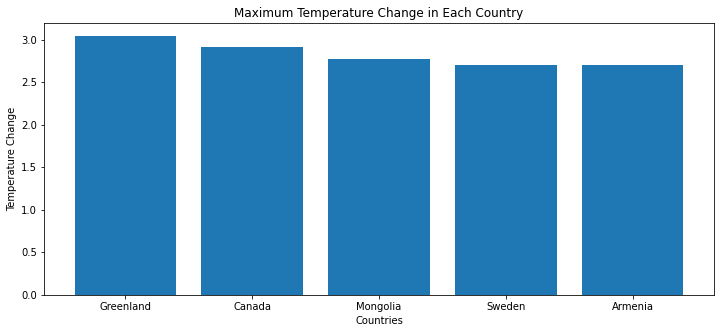

In [ ]:
country_sel = []
temp_change = []
plt.figure(figsize=(12,5))
count = 1
for country in top_country_max_change:
  if count <=  top_limit:
    country_sel.append(country[0])
    temp_change.append(country[1][0])
    count += 1

plt.bar(country_sel, temp_change)
plt.xlabel("Countries")
plt.ylabel("Temperature Change")
plt.title("Maximum Temperature Change in Each Country")
plt.show()


###Top Countries having minimum Temperature Change

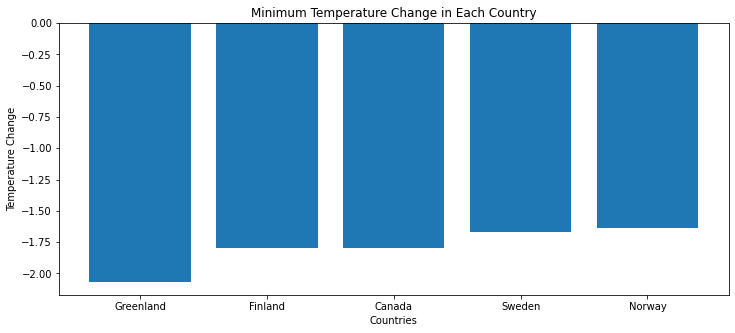

In [ ]:
country_sel = []
temp_change = []
plt.figure(figsize=(12,5))
count = 1
for country in top_country_min_change:
  if count <=  top_limit:
    country_sel.append(country[0])
    temp_change.append(country[1][0])
    count += 1

plt.bar(country_sel, temp_change)
plt.xlabel("Countries")
plt.ylabel("Temperature Change")
plt.title("Minimum Temperature Change in Each Country")
plt.show()

###Year wise Temperature Changes of Top Countries having maximum Temperature Change



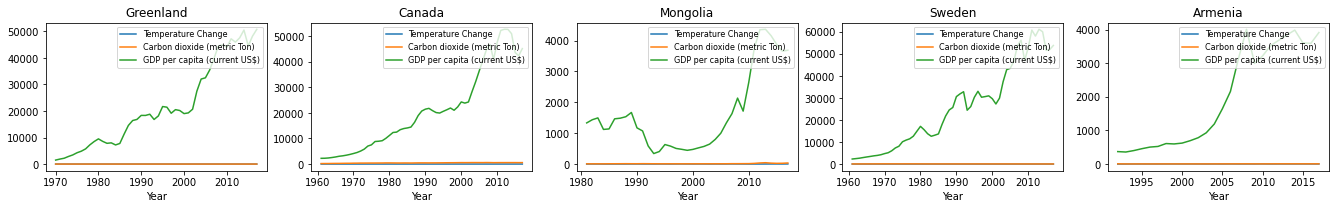

In [ ]:
count = 1
plt.figure(figsize=(23,6))
for country in top_country_max_change:
  if count <=  top_limit:
      dataset = countrywiseDataset.get_group( country[0] )

      # for first country
      xpoints = dataset["Year"]
      y1points = dataset["tem_change"]
      y2points = dataset["Carbon dioxide (metric Ton)"]
      y3points = dataset["GDP per capita (current US$)"]

      plt.subplot(2,5,count)
      plt.plot(xpoints, y1points, label = "Temperature Change" )
      plt.plot(xpoints, y2points, label = "Carbon dioxide (metric Ton)")
      plt.plot(xpoints, y3points, label = "GDP per capita (current US$)")
      plt.xlabel("Year")
      plt.title(country[0])
      count += 1

      
      plt.legend(loc=1, prop={'size': 8})
plt.show()

###Year wise Temperature Changes of Top Countries having minimum Temperature Change

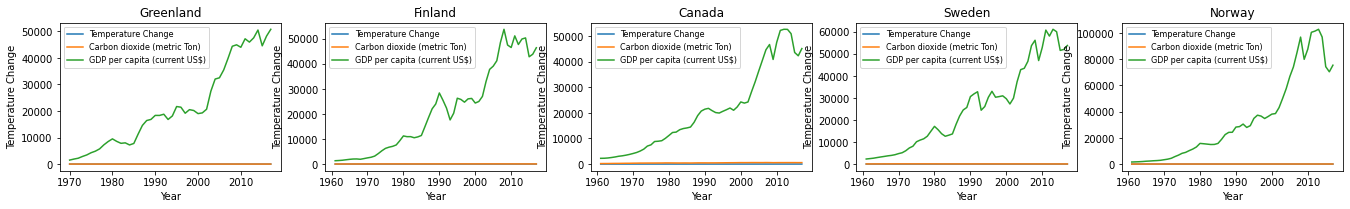

In [ ]:
count = 1
plt.figure(figsize=(23,6))
for country in top_country_min_change:
  if count <=  top_limit:
      dataset = countrywiseDataset.get_group( country[0] )

      # for first country
      xpoints = dataset["Year"]
      y1points = dataset["tem_change"]
      y2points = dataset["Carbon dioxide (metric Ton)"]
      y3points = dataset["GDP per capita (current US$)"]

      plt.subplot(2,5,count)
      plt.plot(xpoints, y1points, label = "Temperature Change" )
      plt.plot(xpoints, y2points, label = "Carbon dioxide (metric Ton)")
      plt.plot(xpoints, y3points, label = "GDP per capita (current US$)")
      plt.xlabel("Year")
      plt.ylabel("Temperature Change")
      plt.title( country[0] )
      count += 1

      plt.legend(loc=2, prop={'size': 8})
plt.show()

###Temperature Changes across Top Countries having maximum Temperature Change


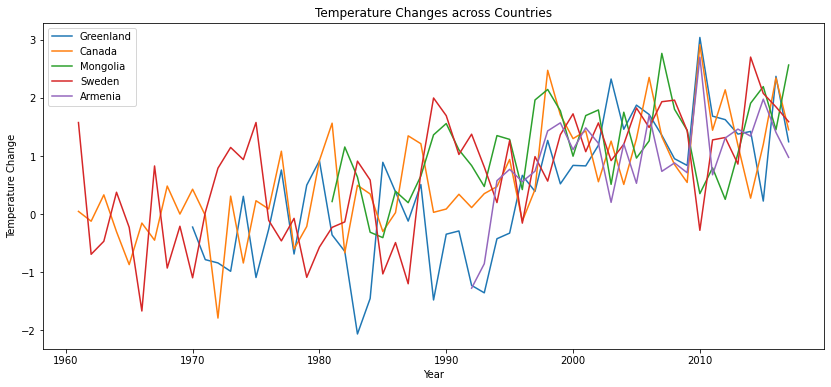

In [ ]:
count = 1
plt.figure(figsize=(14,6))
for country in top_country_max_change:
  if count <=  top_limit:
      dataset = countrywiseDataset.get_group(country[0])

      
      # for first country
      xpoints = dataset["Year"]
      ypoints = dataset["tem_change"]

      plt.plot(xpoints, ypoints, label = country[0] )
      plt.title("Temperature Changes across Countries")
      plt.xlabel("Year")
      plt.ylabel("Temperature Change")
      count += 1

plt.legend()
plt.show()

###Temperature Changes across Top Countries having minimum Temperature Change

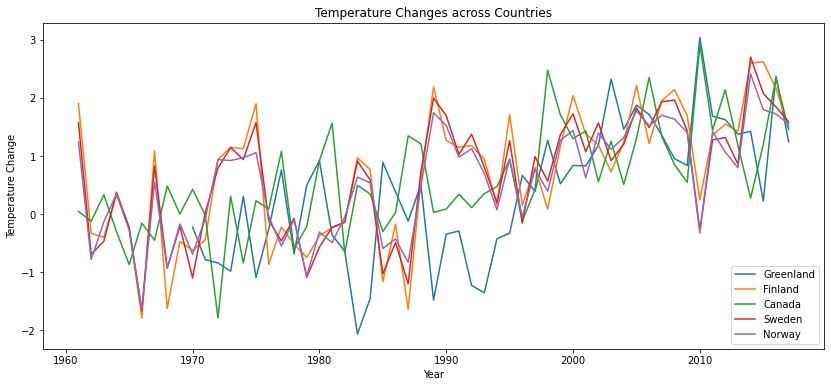

In [ ]:
count = 1
plt.figure(figsize=(14,6))
for country in top_country_min_change:
  if count <=  top_limit:
      dataset = countrywiseDataset.get_group(country[0])

      
      # for first country
      xpoints = dataset["Year"]
      ypoints = dataset["tem_change"]

      plt.plot(xpoints, ypoints, label = country[0] )
      plt.title("Temperature Changes across Countries")
      plt.xlabel("Year")
      plt.ylabel("Temperature Change")
      count += 1

plt.legend()
plt.show()

### Relationship b/w Temperature change and Carbon Dioxide

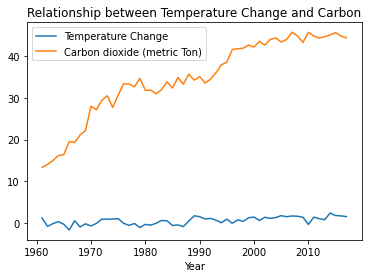

In [ ]:

xpoints = dataset["Year"]
y1points = dataset["tem_change"]
y2points = dataset["Carbon dioxide (metric Ton)"]


plt.plot(xpoints, y1points, label = "Temperature Change")
plt.plot(xpoints, y2points, label = "Carbon dioxide (metric Ton)")
plt.xlabel("Year")
plt.title( "Relationship between Temperature Change and Carbon" )
plt.legend()
plt.show()

### Relationship b/w Temperature change and GDP

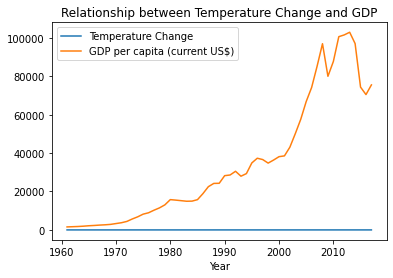

In [ ]:



xpoints = dataset["Year"]
y1points = dataset["tem_change"]
y2points = dataset["GDP per capita (current US$)"]




plt.plot(xpoints, y1points, label = "Temperature Change")
plt.plot(xpoints, y2points, label = "GDP per capita (current US$)")
plt.xlabel("Year")
plt.title( "Relationship between Temperature Change and GDP" )
plt.legend()
plt.show()

###Ignore Down


In [ ]:
'''
for i in range(len(uniquecountry)):
  for j in range(len(uniquecountry)):
    if i != j and j > i:

      dataset1 = countrywiseDataset.get_group(uniquecountry[i])
      dataset2 = countrywiseDataset.get_group(uniquecountry[j])

      # fill missing values
      mean_value = dataset1["tem_change"].mean()
      dataset1["tem_change"].fillna(value=mean_value , inplace = True)

      mean_value = dataset2["tem_change"].mean()
      dataset2["tem_change"].fillna(value=mean_value , inplace = True)

      
      # for first country
      xpoints1 = dataset1["Year"]
      ypoints1 = dataset1["tem_change"]

      """
      plt.subplot(1, 2, 1)
      plt.plot(xpoints1, ypoints1)
      plt.title(uniquecountry[i])
      """

      # for second country
      xpoints2 = dataset2["Year"]
      ypoints2 = dataset2["tem_change"]

      """
      plt.subplot(1, 2, 2)
      plt.plot(xpoints2, ypoints2 )
      plt.title(uniquecountry[j])
      """

      # calculate Pearson's correlation
      # corr, _ = pearsonr(ypoints1, ypoints2)
      #print(f'Pearsons correlation between {uniquecountry[i]} and {uniquecountry[j]} is {corr}')

'''

'\nfor i in range(len(uniquecountry)):\n  for j in range(len(uniquecountry)):\n    if i != j and j > i:\n\n      dataset1 = countrywiseDataset.get_group(uniquecountry[i])\n      dataset2 = countrywiseDataset.get_group(uniquecountry[j])\n\n      # fill missing values\n      mean_value = dataset1["tem_change"].mean()\n      dataset1["tem_change"].fillna(value=mean_value , inplace = True)\n\n      mean_value = dataset2["tem_change"].mean()\n      dataset2["tem_change"].fillna(value=mean_value , inplace = True)\n\n      \n      # for first country\n      xpoints1 = dataset1["Year"]\n      ypoints1 = dataset1["tem_change"]\n\n      """\n      plt.subplot(1, 2, 1)\n      plt.plot(xpoints1, ypoints1)\n      plt.title(uniquecountry[i])\n      """\n\n      # for second country\n      xpoints2 = dataset2["Year"]\n      ypoints2 = dataset2["tem_change"]\n\n      """\n      plt.subplot(1, 2, 2)\n      plt.plot(xpoints2, ypoints2 )\n      plt.title(uniquecountry[j])\n      """\n\n      # calculate 

###Machine Learning

In [77]:
myTempChangeDataset.head()

,Country Name,Year,Count,tem_change,Carbon dioxide (metric Ton),GDP per capita (current US$),Energy use (kg of oil equivalent per capita)
0,Afghanistan,1961,9169410,-0.080,0.490800,59.860900,0.000000
1,Australia,1961,10483000,0.151,90.503900,1877.616638,3115.787084
2,Austria,1961,7086299,1.035,31.824000,1031.815004,1554.034906
3,Burundi,1961,2852438,0.068,0.047737,71.167188,0.000000
4,Benin,1961,2465867,-0.116,0.128240,95.572232,0.000000


In [78]:
# here we are defining a function 
def encode_cat(feature):   # function will take feature 
  mapping_dic = {}         # empty dic 
  unique_val = list(myTempChangeDataset[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic       # return the feature 

myTempChangeDataset['Country Name'].replace(encode_cat('Country Name'), inplace = True)  
  # print(data.head())

In [79]:
myTempChangeDataset.describe()

,Country Name,Year,Count,tem_change,Carbon dioxide (metric Ton),GDP per capita (current US$),Energy use (kg of oil equivalent per capita)
count,7706.000000,7706.000000,7.706000e+03,7706.000000,7706.000000,7706.000000,7706.000000
mean,73.298469,1992.607189,3.144162e+07,0.544170,102.420150,8302.804923,1364.178913
std,45.769381,15.898608,1.246272e+08,0.623976,439.680123,16712.075361,2362.568979
min,0.000000,1961.000000,8.913000e+03,-2.067000,0.003664,12.802812,0.000000
25%,34.000000,1980.000000,1.254168e+06,0.107000,1.187600,534.724599,0.000000
50%,70.000000,1994.000000,5.613286e+06,0.496000,8.159150,1881.924326,444.183278
75%,107.000000,2006.000000,1.688419e+07,0.960750,61.468850,7870.509034,1712.430053
max,177.000000,2017.000000,1.386395e+09,3.042000,9985.583400,189432.370000,22120.430300


In [97]:
newdata = myTempChangeDataset.head(10)

In [99]:
list(newdata["Country Name"])

['Afghanistan',
 'Australia',
 'Austria',
 'Burundi',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Belize',
 'Brazil',
 'Central African Republic']

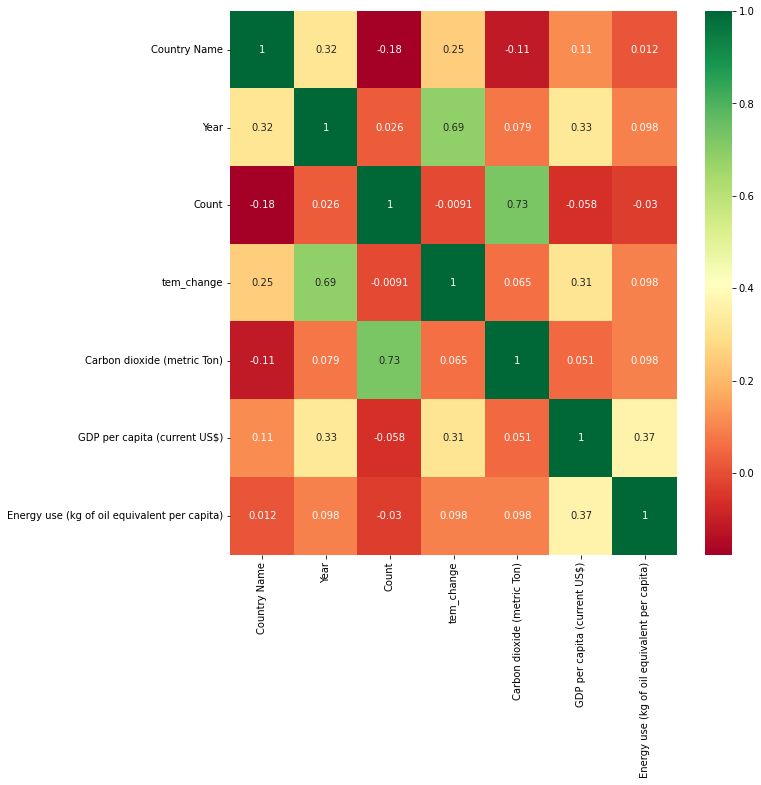

In [81]:
corrmat = myTempChangeDataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(myTempChangeDataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [82]:
target = myTempChangeDataset[["tem_change"]]
myTempChangeDataset.drop(["Count","Energy use (kg of oil equivalent per capita)"], inplace = True, axis = 1)
myTempChangeDataset

,Country Name,Year,tem_change,Carbon dioxide (metric Ton),GDP per capita (current US$)
0,0,1961,-0.080,0.490800,59.860900
1,1,1961,0.151,90.503900,1877.616638
2,2,1961,1.035,31.824000,1031.815004
3,3,1961,0.068,0.047737,71.167188
4,4,1961,-0.116,0.128240,95.572232
...,...,...,...,...,...
7701,117,2017,1.312,0.139230,3082.540055
7702,126,2017,1.303,0.245490,4258.978675
7703,78,2017,1.125,464.198700,6690.939847
7704,79,2017,0.646,6.517200,1535.196574


In [84]:
myTempChangeDataset.head()

,Country Name,Year,Carbon dioxide (metric Ton),GDP per capita (current US$)
0,0,1961,0.490800,59.860900
1,1,1961,90.503900,1877.616638
2,2,1961,31.824000,1031.815004
3,3,1961,0.047737,71.167188
4,4,1961,0.128240,95.572232


In [83]:
myTempChangeDataset.drop(["tem_change"], inplace = True, axis = 1)
#myTempChangeDataset2.head()

In [51]:
myTempChangeDataset.shape

(7706, 4)

Try # 1

In [52]:
target

,tem_change
0,-0.080
1,0.151
2,1.035
3,0.068
4,-0.116
...,...
7701,1.312
7702,1.303
7703,1.125
7704,0.646


In [87]:
# scaler = StandardScaler()
# scale_data = scaler.fit_transform(myTempChangeDataset) 
# target = scaler.fit_transform(target)
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(myTempChangeDataset, target, test_size = 0.25)

regr = linear_model.LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))

0.4812238176286341


Try # 2

In [54]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
#5 Predicting a new result
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:

  
# print the predicted temp_change
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.504605803865442


In [23]:
import numpy as np

Try # 3

In [88]:
from sklearn.ensemble import RandomForestRegressor 
#Put 10 for the n_estimators argument. n_estimators mean the number of trees in the forest.
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train,y_train)

#4 Predicting a new result
y_pred = regressor.predict(X_test)

In [89]:
# print the predicted temp_change
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.617598651271877


In [90]:
import pickle
pickle.dump(regressor, open('model_1.pkl', 'wb'))

In [92]:
X_test[5:]

,Country Name,Year,Carbon dioxide (metric Ton),GDP per capita (current US$)
1753,57,1978,22.4127,750.432867
22,22,1961,314.6585,1428.046001
6935,135,2013,0.1925,173030.208300
5698,17,2006,100.2029,3478.710002
5436,88,2004,27.5925,10126.137740
...,...,...,...,...
6528,8,2011,462.5800,13245.387370
6613,140,2011,3.1066,594.586149
2219,53,1982,30.9567,15224.893910
7119,148,2014,7.4599,5495.735049


Try # 4

In [59]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [60]:
ypred = neigh.predict(X_test)
print(r2_score(y_test,y_pred))

0.6233657215576871


Try # 5 - current


In [63]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [64]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [65]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [67]:
NN_model.fit(scale_data, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
176/193 [==========================>...] - ETA: 0s - loss: 0.5393 - mean_absolute_error: 0.5393
Epoch 1: val_loss improved from inf to 0.62180, saving model to Weights-001--0.62180.hdf5
193/193 [==============================] - 2s 5ms/step - loss: 0.5371 - mean_absolute_error: 0.5371 - val_loss: 0.6218 - val_mean_absolute_error: 0.6218
Epoch 2/500
192/193 [============================>.] - ETA: 0s - loss: 0.5240 - mean_absolute_error: 0.5240
Epoch 2: val_loss improved from 0.62180 to 0.60217, saving model to Weights-002--0.60217.hdf5
193/193 [==============================] - 1s 4ms/step - loss: 0.5241 - mean_absolute_error: 0.5241 - val_loss: 0.6022 - val_mean_absolute_error: 0.6022
Epoch 3/500
192/193 [============================>.] - ETA: 0s - loss: 0.5230 - mean_absolute_error: 0.5230
Epoch 3: val_loss did not improve from 0.60217
193/193 [==============================] - 1s 4ms/step - loss: 0.5229 - mean_absolute_error: 0.5229 - val_loss: 0.6542 - val_mean_absolute_

In [17]:
# fit a final xgboost model on the housing dataset and make a prediction
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor

# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)
# define new data

# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print(yhat)

[02:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.3980965  0.26750618 0.96385324 ... 0.29133192 1.2113678  0.0075804 ]


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test,yhat))

0.5688000204222181


In [131]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping